From Miguel Lukas and Gabriel Medeiros, adapted by Erick.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Exibição dos gráficos em janela externa:
'''
%matplotlib qt
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20
'''

"\n%matplotlib qt\nplt.rcParams['lines.linewidth'] = 3\nplt.rcParams['font.size'] = 20\n"

In [2]:
m1 = 1.063177 #kg
m2 = 1.063177 #kg

k1 = 249.5116*4 #N/m
k2 = 249.5116*4 #N/m

M = np.array([
    [m1, 0],
    [0, m2]
])

K = np.array([
    [k1+k2, -k2],
    [-k2, k2]
])

# Condições Iniciais
X0 = np.array([
    [0.002034],
    [0]
])

V0 = np.array([
    [0],
    [0]
])

In [3]:
# Calculando M^(-1/2)
M_12 = np.zeros((2,2))

for i in range(len(M)):
    for j in range(len(M)):
        if i == j:
            M_12[i][j] = 1/np.sqrt(M[i][j])

# Calculando K~
K_ = M_12 @ K @ M_12

print(M_12)
print(K_)

[[0.96983357 0.        ]
 [0.         0.96983357]]
[[1877.47929084 -938.73964542]
 [-938.73964542  938.73964542]]


In [4]:
# Encontrando os autovalores
lamb = sp.Symbol('lamb')
lamb_I = np.identity(2)*lamb

A = sp.Matrix(K_ - lamb_I)
det = A.det()

autovalores = sp.solve(det,lamb)

lambda_1 = float(autovalores[0])
lambda_2 = float(autovalores[1])

print("Autovalores:")
print(lambda_1, lambda_2)

# Encontrando as frequências naturais
w_1 = np.sqrt(lambda_1)
w_2 = np.sqrt(lambda_2)

print("Frequências:")
print(w_1, w_2)

# Encontrando os autovetores normalizados
A1 = A.subs({lamb:lambda_1})
A2 = A.subs({lamb:lambda_2})

v1, v2 = sp.symbols('v1 v2')

v = np.array([[v1],
              [v2]])

zeros = np.zeros((2, 1))

B1 = sp.Matrix(A1 @ v)
B2 = sp.Matrix(A2 @ v)

eq = sp.Eq(v1**2 + v2**2, 1)
autovetor_1 = np.array(sp.solve([B1[0], eq], (v1, v2))[1])
autovetor_2 = np.array(sp.solve([B2[0], eq], (v1, v2))[1])

print("Autovetores:")
print(autovetor_1)
print(autovetor_2)

Autovalores:
358.56663796388267 2457.652298299787
Frequências:
18.93585588147213 49.57471430376364
Autovetores:
[0.525731112119134 0.850650808352039]
[0.850650808352040 -0.525731112119134]


In [5]:
# Montando a matriz P (matriz de autovetores)
P = np.array([[float(autovetor_1[0]), float(autovetor_2[0])],
              [float(autovetor_1[1]), float(autovetor_2[1])]])

# Montando a matriz S
S = M_12 @ P

# Montando a matriz S^(-1)
S_1 = np.linalg.inv(S)

print("P:")
print(P)
print("S:")
print(S)
print("S^(-1):")
print(S_1)

P:
[[ 0.52573111  0.85065081]
 [ 0.85065081 -0.52573111]]
S:
[[ 0.50987168  0.82498971]
 [ 0.82498971 -0.50987168]]
S^(-1):
[[ 0.54208385  0.87711009]
 [ 0.87711009 -0.54208385]]


In [6]:
r0 = S_1 @ X0
r0_dot = S_1 @ V0

print(r0, r0_dot)
"""""
A1 = ((np.sqrt((w_1**2)*(r0[0]**2)+(r0_dot[0]**2)))/w_1)[0]
A2 = ((np.sqrt((w_2**2)*(r0[1]**2)+(r0_dot[1]**2)))/w_2)[0]
"""

# Amortecido:
zeta = 0.006

wd1 = w_1*np.sqrt(1-(zeta**2))
wd2 = w_2*np.sqrt(1-(zeta**2))

print(wd1, wd2)

A1 = np.sqrt((((r0_dot[0] + zeta*w_1*r0[0])**2)+((r0[0]*wd1)**2))/(wd1**2))[0]
A2 = np.sqrt((((r0_dot[1] + zeta*w_2*r0[1])**2)+((r0[1]*wd2)**2))/(wd2**2))[0]

print(A1, A2)

"""""
phi1 = np.arctan((w_1*r0[0])/(r0_dot[0]))
phi2 = np.arctan((w_2*r0[1])/(r0_dot[1]))
"""

phi1 = np.arctan((r0[0]*wd1)/(r0_dot[0]+(zeta*w_1*r0[0])))
phi2 = np.arctan((r0[1]*wd2)/(r0_dot[1]+(zeta*w_2*r0[1])))



if (r0_dot[0]+(zeta*w_1*r0[0])) == 0: phi1 = np.pi/2
if (r0_dot[1]+(zeta*w_2*r0[1])) == 0: phi2 = np.pi/2

print(phi1, phi2)

A = np.array([[A1],
              [A2]])

X = S @ A

# Formas modais

def r_1(t):
    return A[0]*np.sin(wd1*t+phi1)*np.exp(-zeta*w_1*t)

def r_2(t):
    return A[1]*np.sin(wd2*t+phi2)*np.exp(-zeta*w_2*t)

# Resposta temporal

def x_1(t):
    return S[0][0]*A[0]*np.sin(wd1*t+phi1)*np.exp(-zeta*w_1*t) + S[0][1]*A[1]*np.sin(wd2*t+phi2)*np.exp(-zeta*w_2*t)

def x_2(t):
    return S[1][0]*A[0]*np.sin(wd1*t+phi1)*np.exp(-zeta*wd1*t) + S[1][1]*A[1]*np.sin(wd2*t+phi2)*np.exp(-zeta*w_2*t)

[[0.0011026 ]
 [0.00178404]] [[0.]
 [0.]]
18.935515032998598 49.57382195087492
0.0011026183891251152 0.001784074030225091
[1.56479629] [1.56479629]


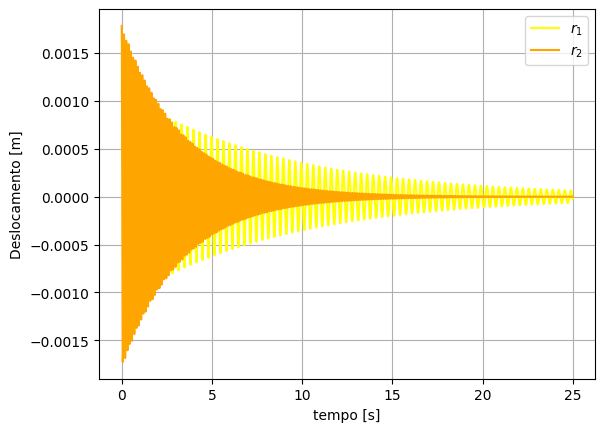

In [7]:
# Plotando as formas modais

t0 = 0
tf = 25
Ts = 1e-2
time = np.arange(t0, tf, Ts)

r1 = r_1(time)
r2 = r_2(time)

#plt.figure(2)

plt.figure(1)
plt.plot(time, r1, 'yellow', label='$r_1$')
plt.plot(time, r2, 'orange', label='$r_2$')
plt.ylabel('Deslocamento [m]')
plt.xlabel('tempo [s]')
#plt.xlim(0, 1)
plt.legend(loc='upper right')
plt.grid()
plt.show()

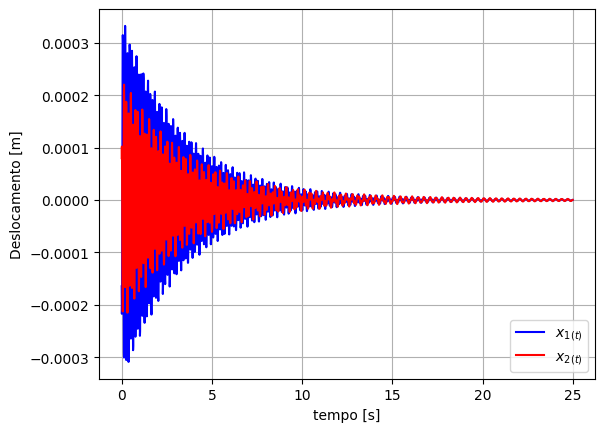

In [8]:
# Plotando a resposta no tempo

t0 = 0
tf = 25
Ts = 1e-2
time = np.arange(t0, tf, Ts)

x1 = x_1(time)
x2 = x_2(time)

a1 = np.gradient(np.gradient(x1))
a2 = np.gradient(np.gradient(x2))

plt.figure(2)
#plt.plot(time, x1+x2, 'purple')
plt.plot(time, a1, 'blue', label='${x_1}_{(t)}$')
plt.plot(time, a2, 'red', label='${x_2}_{(t)}$')
plt.xlabel('tempo [s]')
plt.ylabel('Deslocamento [m]')
#plt.xlim(0, 1)
plt.legend(loc='lower right')
plt.grid()

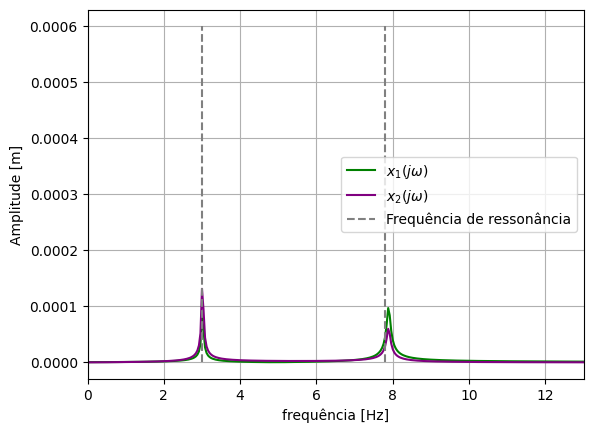

Frequências de Ressonância
x1(s):  49.51150022057514
x2(s):  18.84955592153876


In [10]:
# Plotando a resposta em frequência

def fft(signal, t):
    fft = np.fft.fft(signal)

    T = t[1] - t[0]
    N = signal.shape[0]

    f = np.fft.fftfreq(len(signal), T)

    freqs = f[:N // 2]*2*np.pi
    amplitudes = np.abs(fft)[:N // 2] * (1 / N)

    return freqs, amplitudes

fft_x1 = fft(x1, time)
fft_x2 = fft(x2, time)

# Frequências de ressonância
freq_res_x1 = fft_x1[0][np.where(fft_x1[1]==np.max(fft_x1[1]))]
freq_res_x2 = fft_x2[0][np.where(fft_x2[1]==np.max(fft_x2[1]))]


# Amplitude em função de frequência
plt.plot((fft_x1[0]/(2*np.pi)), fft_x1[1], 'green', label='${x_1}(j\omega)$')
plt.plot((fft_x2[0]/(2*np.pi)), fft_x2[1], 'purple', label='${x_2}(j\omega)$')
plt.plot([7.8, 7.8], [0, 0.0006], 'gray', linestyle='dashed', label='Frequência de ressonância')
plt.plot([3, 3], [0, 0.0006], 'gray', linestyle='dashed')
plt.xlabel('frequência [Hz]')
plt.ylabel('Amplitude [m]')
plt.legend()
plt.xlim(0, 13)
#plt.ylim(0, 0.01)
plt.grid()
plt.show()



print("Frequências de Ressonância")
print("x1(s): ", freq_res_x1[0])
print("x2(s): ", freq_res_x2[0])